In [1]:
import pandas as pd
import numpy as np
import os
import collections
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams.update({"font.size":20})
pd.set_option('display.max_columns', 500)

In [3]:
%%time
train = pd.read_csv("../processed_data/fillna_with_mean.csv")

CPU times: user 2min 56s, sys: 37.5 s, total: 3min 34s
Wall time: 3min 54s


In [4]:
X = train[~train.isFraud.isna()].drop(["TransactionID", "isFraud"], axis="columns")
Y = train.loc[~train.isFraud.isna(), "isFraud"]
X_finaltest = train[train.isFraud.isna()].drop(["TransactionID", "isFraud"], axis="columns")
Y_finaltest = train.loc[train.isFraud.isna(), "TransactionID"]

In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

In [6]:
def confusion_matrix(y_true, y_pred):
    TP = sum((y_pred == 1) & (y_true == 1))
    TN = sum((y_pred == 0) & (y_true == 0))
    FP = sum((y_pred == 1) & (y_true == 0))
    FN = sum((y_pred == 0) & (y_true == 1))
    print("{}TP | {}FP\n-----------------\n{}FN | {}TN".format(TP, FP, FN, TN))
    
    recall = 1.0*TP/(TP+FN)
    precision = 1.0*TP/(TP+FP)
    accuracy = 1.0*(TP+TN)/(TP+FP+TN+FN)
    
    f1 = 2.0/ (1/recall + 1/precision)
    print("\naccuracy: {:.4}, recall: {:.4}, precision: {:.4}, F-1 score: {:.4}".format(accuracy, recall, precision, f1))
    return TP, TN, FP, FN, recall, precision, f1

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 23)

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
%%time
param_grid = {"max_depth":[10,50,100,500],
             "n_estimators": [10,100,500],
             "min_samples_split": [2, 5, 10]}
RF = RandomForestClassifier(class_weight='balanced', verbose=1)
clf_RF = RandomizedSearchCV(RF, param_grid, n_iter=10, n_jobs=2, scoring='roc_auc', cv=3, verbose=2)
clf_RF.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=500, min_samples_split=5, max_depth=50 .............
[CV] n_estimators=500, min_samples_split=5, max_depth=50 .............


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 17.9min finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 18.1min finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   38.0s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   39.8s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  1.2min finished


[CV]  n_estimators=500, min_samples_split=5, max_depth=50, total=19.2min
[CV] n_estimators=500, min_samples_split=5, max_depth=50 .............


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  1.2min finished


[CV]  n_estimators=500, min_samples_split=5, max_depth=50, total=19.3min
[CV] n_estimators=500, min_samples_split=5, max_depth=10 .............


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  9.2min finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   17.0s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   25.7s finished


[CV]  n_estimators=500, min_samples_split=5, max_depth=10, total=10.2min
[CV] n_estimators=500, min_samples_split=5, max_depth=10 .............


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  7.2min finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   12.7s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   25.1s finished


[CV]  n_estimators=500, min_samples_split=5, max_depth=10, total= 7.9min
[CV] n_estimators=500, min_samples_split=5, max_depth=10 .............


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 19.6min finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   40.0s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  1.2min finished


[CV]  n_estimators=500, min_samples_split=5, max_depth=50, total=21.0min
[CV] n_estimators=10, min_samples_split=5, max_depth=100 .............


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   20.1s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.5s finished


[CV]  n_estimators=10, min_samples_split=5, max_depth=100, total=  45.0s
[CV] n_estimators=10, min_samples_split=5, max_depth=100 .............


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   20.1s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.5s finished


[CV]  n_estimators=10, min_samples_split=5, max_depth=100, total=  44.5s
[CV] n_estimators=10, min_samples_split=5, max_depth=100 .............


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   19.6s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.5s finished


[CV]  n_estimators=10, min_samples_split=5, max_depth=100, total=  45.6s
[CV] n_estimators=10, min_samples_split=10, max_depth=50 .............


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   19.7s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.4s finished


[CV]  n_estimators=10, min_samples_split=10, max_depth=50, total=  43.9s
[CV] n_estimators=10, min_samples_split=10, max_depth=50 .............


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   19.4s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  7.1min finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.3s finished


[CV]  n_estimators=10, min_samples_split=10, max_depth=50, total=  42.0s
[CV] n_estimators=10, min_samples_split=10, max_depth=50 .............


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   14.1s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   21.5s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   25.2s finished


[CV]  n_estimators=500, min_samples_split=5, max_depth=10, total= 7.8min
[CV] n_estimators=100, min_samples_split=5, max_depth=50 .............


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.9s finished


[CV]  n_estimators=10, min_samples_split=10, max_depth=50, total=  44.0s
[CV] n_estimators=100, min_samples_split=5, max_depth=50 .............


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.4min finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.4min finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    6.9s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    6.8s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   13.9s finished


[CV]  n_estimators=100, min_samples_split=5, max_depth=50, total= 4.0min
[CV] n_estimators=100, min_samples_split=5, max_depth=50 .............


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   13.8s finished


[CV]  n_estimators=100, min_samples_split=5, max_depth=50, total= 3.9min
[CV] n_estimators=100, min_samples_split=2, max_depth=500 ............


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  4.0min finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  4.0min finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.6s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    9.4s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   15.4s finished


[CV]  n_estimators=100, min_samples_split=5, max_depth=50, total= 4.7min
[CV] n_estimators=100, min_samples_split=2, max_depth=500 ............


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   14.5s finished


[CV]  n_estimators=100, min_samples_split=2, max_depth=500, total= 4.8min
[CV] n_estimators=100, min_samples_split=2, max_depth=500 ............


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.6min finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.6min finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    7.7s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    7.6s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   15.1s finished


[CV]  n_estimators=100, min_samples_split=2, max_depth=500, total= 4.4min
[CV] n_estimators=500, min_samples_split=10, max_depth=500 ...........


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   14.5s finished


[CV]  n_estimators=100, min_samples_split=2, max_depth=500, total= 4.4min
[CV] n_estimators=500, min_samples_split=10, max_depth=500 ...........


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 17.0min finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 17.1min finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   35.9s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   38.5s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  1.2min finished


[CV]  n_estimators=500, min_samples_split=10, max_depth=500, total=18.1min
[CV] n_estimators=500, min_samples_split=10, max_depth=500 ...........


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  1.2min finished


[CV]  n_estimators=500, min_samples_split=10, max_depth=500, total=18.4min
[CV] n_estimators=100, min_samples_split=10, max_depth=50 ............


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.4min finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    7.0s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   14.1s finished


[CV]  n_estimators=100, min_samples_split=10, max_depth=50, total= 4.1min
[CV] n_estimators=100, min_samples_split=10, max_depth=50 ............


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.3min finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    7.0s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   14.3s finished


[CV]  n_estimators=100, min_samples_split=10, max_depth=50, total= 3.9min
[CV] n_estimators=100, min_samples_split=10, max_depth=50 ............


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.3min finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    7.1s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   14.0s finished


[CV]  n_estimators=100, min_samples_split=10, max_depth=50, total= 3.9min
[CV] n_estimators=10, min_samples_split=10, max_depth=10 .............


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    8.2s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished


[CV]  n_estimators=10, min_samples_split=10, max_depth=10, total=  35.8s
[CV] n_estimators=10, min_samples_split=10, max_depth=10 .............


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    8.2s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished


[CV]  n_estimators=10, min_samples_split=10, max_depth=10, total=  34.7s
[CV] n_estimators=10, min_samples_split=10, max_depth=10 .............


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    8.3s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished


[CV]  n_estimators=10, min_samples_split=10, max_depth=10, total=  32.2s
[CV] n_estimators=10, min_samples_split=10, max_depth=100 ............


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   20.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.5s finished


[CV]  n_estimators=10, min_samples_split=10, max_depth=100, total=  43.8s
[CV] n_estimators=10, min_samples_split=10, max_depth=100 ............


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   19.9s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 16.9min finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.4s finished


[CV]  n_estimators=10, min_samples_split=10, max_depth=100, total=  37.3s
[CV] n_estimators=10, min_samples_split=10, max_depth=100 ............


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   39.7s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   19.7s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.4s finished


[CV]  n_estimators=10, min_samples_split=10, max_depth=100, total=  40.1s


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  1.1min finished


[CV]  n_estimators=500, min_samples_split=10, max_depth=500, total=18.2min


[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed: 103.0min finished


CPU times: user 32min 9s, sys: 2min 33s, total: 34min 43s
Wall time: 2h 11min 50s


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 28.5min finished


In [20]:
clf_RF.cv_results_["params"]

[{'n_estimators': 500, 'min_samples_split': 5, 'max_depth': 50},
 {'n_estimators': 500, 'min_samples_split': 5, 'max_depth': 10},
 {'n_estimators': 10, 'min_samples_split': 5, 'max_depth': 100},
 {'n_estimators': 10, 'min_samples_split': 10, 'max_depth': 50},
 {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 50},
 {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 500},
 {'n_estimators': 500, 'min_samples_split': 10, 'max_depth': 500},
 {'n_estimators': 100, 'min_samples_split': 10, 'max_depth': 50},
 {'n_estimators': 10, 'min_samples_split': 10, 'max_depth': 10},
 {'n_estimators': 10, 'min_samples_split': 10, 'max_depth': 100}]

In [19]:
clf_RF.cv_results_["mean_test_score"]

array([0.9369704 , 0.88383475, 0.88026838, 0.88974424, 0.92998797,
       0.92531856, 0.93534699, 0.93134754, 0.8787437 , 0.89194102])

In [13]:
TP, TN, FP, FN, recall, precision, f1 = confusion_matrix(y_test, clf_RF.predict(X_test))

1824TP | 152FP
-----------------
2233FN | 113899TN

accuracy: 0.9798, recall: 0.4496, precision: 0.9231, F-1 score: 0.6047


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   28.6s finished


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   26.7s finished


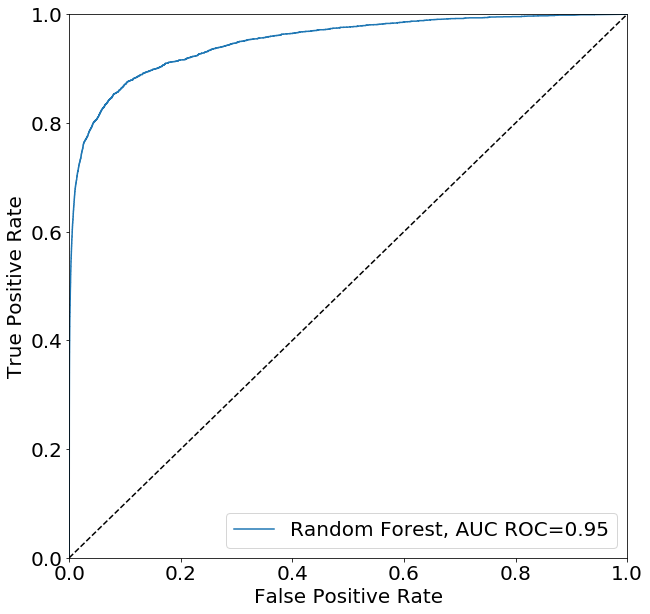

In [14]:
plt.figure(figsize=(10,10))
prob = clf_RF.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, prob[:,1])
plt.plot(fpr, tpr, label="Random Forest, AUC ROC={:.3}".format(roc_auc_score(y_test, prob[:,1])))
plt.axis([0,1,0,1])
plt.plot(np.linspace(0,1,10), np.linspace(0,1,10), 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

In [15]:
prob = clf_RF.predict_proba(X_finaltest)

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  1.8min finished


In [16]:
pd.DataFrame({"TransactionID": Y_finaltest, "isFraud": prob[:,1]}).to_csv("../submissions/tuned_RF.csv", index=False)